# Análise de Empréstimo

## Preparando o ambiente de desenvolvimento

### Importando as bibliotecas de dependências

Importando as bibliotecas necessárias para análise dos dados e tratamento:

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importando as bibliotecas necessárias para o projeto de machine learning:

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

Importando as bibliotecas para tipagem

In [162]:
from typing import Dict, Optional

### Ingerindo a base de dados do kaggle

Para realizar o densevolvimento do modelo iremos usar uma base de dados do kaggle:

In [163]:
!kaggle datasets download "laotse/credit-risk-dataset"
!unzip credit-risk-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
credit-risk-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  credit-risk-dataset.zip
replace credit_risk_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [164]:
base_credit  = pd.read_csv('credit_risk_dataset.csv')

## Análise da Base de Dados

### Visão geral da base de dados

In [165]:
base_credit.shape

(32581, 12)

In [166]:
base_credit.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [167]:
base_credit.tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [168]:
base_credit.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [169]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [170]:
base_credit.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


Dicionário dos dados:

|Atributo|Descrição|Tipo|Subtipo|
|-|-|-|-|
|person_age|A idade do aplicante|numérico|discreto|
|person_income|A renda anual do aplicante|numérico|contínuo|
|person_home_ownership|Se o aplicante tem casa|categórica|nominal|
|loan_intent|Qual é a intenção do empréstimo|categórica|nominal|
|loan_grade|Qual é a categoria do empréstimo|categórica|ordinal|
|loan_amnt|Quantia de empréstimo|numérico|contínuo|
|loan_int_rate|Qual é o percentual do juros|numérico|contínuo|
|loan_status|Se o empréstimo do aplicante foi aprovado|categórica|nominal|
|cb_person_default_on_file|Histórico de inadimplência do aplicante|categórico|nominal|
|loan_percent_income|O percentual do empréstimo em relação a renda|numérico|contínuo|
|person_emp_length|Os anos em que o aplicante está empregado|numérico|discreto|


#### Conclusões

-  Há dados faltantes (*missing data*) nos atributos `person_emp_length` e `lon_int_rate`.
- Há pessoas com 140 anos de idade, o que pode ser um indício de inputação de dados incorretos. Visto que não há registros de pessoas com mais de 120 anos (fonte: [clique aqui](https://pt.wikipedia.org/wiki/Lista_das_pessoas_mais_velhas_do_mundo))
- Há desbalanceamento notável entre na classe alvo, apenas 28% dos aplicantes são inadimplentes

### Exploração dos dados categóricos

Explorando os valores únicos dos atributos categóricos:

In [171]:
base_credit['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [172]:
base_credit['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [173]:
base_credit['loan_status'].unique()

array([1, 0])

In [174]:
base_credit['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [175]:
base_credit['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

### Exploração da consistência dos dados e preprocessamento

Checando a consistência dos dados `person_income` (renda anual) e `loan_percent_income` (percentual do empréstimo em relação anual).

In [176]:
def truncate(value: float, decimal_places: int) -> float:
    """
    Truncate a value to a specific number of decimal places without rounding.

    :param value: The number to be truncated.
    :param decimal_places: Number of decimal places to keep.
    :return: Truncated float value.
    """
    factor = 10 ** decimal_places
    return np.floor(value * factor) / factor

def calculate_expected_loan_percent(df: pd.DataFrame, decimal_places: int) -> pd.Series:
    """
    Calculate the expected `loan_percent_income` based on `loan_amnt` and `person_income`.

    :param df: Pandas DataFrame containing `loan_amnt` and `person_income`.
    :param decimal_places: Number of decimal places to keep in the calculation.
    :return: A Pandas Series with the expected `loan_percent_income` values.
    """
    expected_loan_percent = df['loan_amnt'] / df['person_income']
    return expected_loan_percent.apply(lambda x: truncate(x, decimal_places))

def check_income_consistency(df: pd.DataFrame, decimal_places: int = 2) -> tuple:
    """
    Check if `loan_percent_income` values are consistent with `person_income` and `loan_amnt`.

    :param df: Pandas DataFrame containing `person_income`, `loan_amnt`, and `loan_percent_income`.
    :param decimal_places: Number of decimal places for truncation (default is 2).
    :return: A tuple (True/False if consistent, DataFrame with inconsistencies).
    """
    df['expected_loan_percent'] = calculate_expected_loan_percent(df, decimal_places)

    # Identify inconsistent rows
    inconsistent_rows = df[df['loan_percent_income'] != df['expected_loan_percent']]

    return inconsistent_rows.empty, inconsistent_rows

In [177]:
is_consistent, inconsistent_rows = check_income_consistency(base_credit)

print(f"Is consistent: {is_consistent}")

Is consistent: False


In [178]:
inconsistent_rows

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,expected_loan_percent
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,0.64
12,23,95000,RENT,2.0,VENTURE,A,35000,7.90,1,0.37,N,2,0.36
17,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,1,0.32,N,4,0.37
18,23,113000,RENT,8.0,DEBTCONSOLIDATION,D,35000,18.25,1,0.31,N,4,0.30
20,25,162500,RENT,2.0,VENTURE,A,35000,7.49,0,0.22,N,4,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26,0.43
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19,0.30
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20,0.07
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,0.10


#### Conclusão
  - O percentual de endividamento (`loan_percent_income`) está inconsistente em relação a renda anual do aplicante (`person_income`) e o valor do empréstimo (`loan_amnt`).

#### Solução para o problema

Substituir `loan_percent_income` pelo valor de `expected_loan_percent`:

In [179]:
base_credit['loan_percent_income'] = base_credit['expected_loan_percent']
base_credit = base_credit.drop(columns=['expected_loan_percent'])
base_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.64,Y,4


### Vizualizar os dados

Checando se a base de dados está balanceada:

<Axes: >

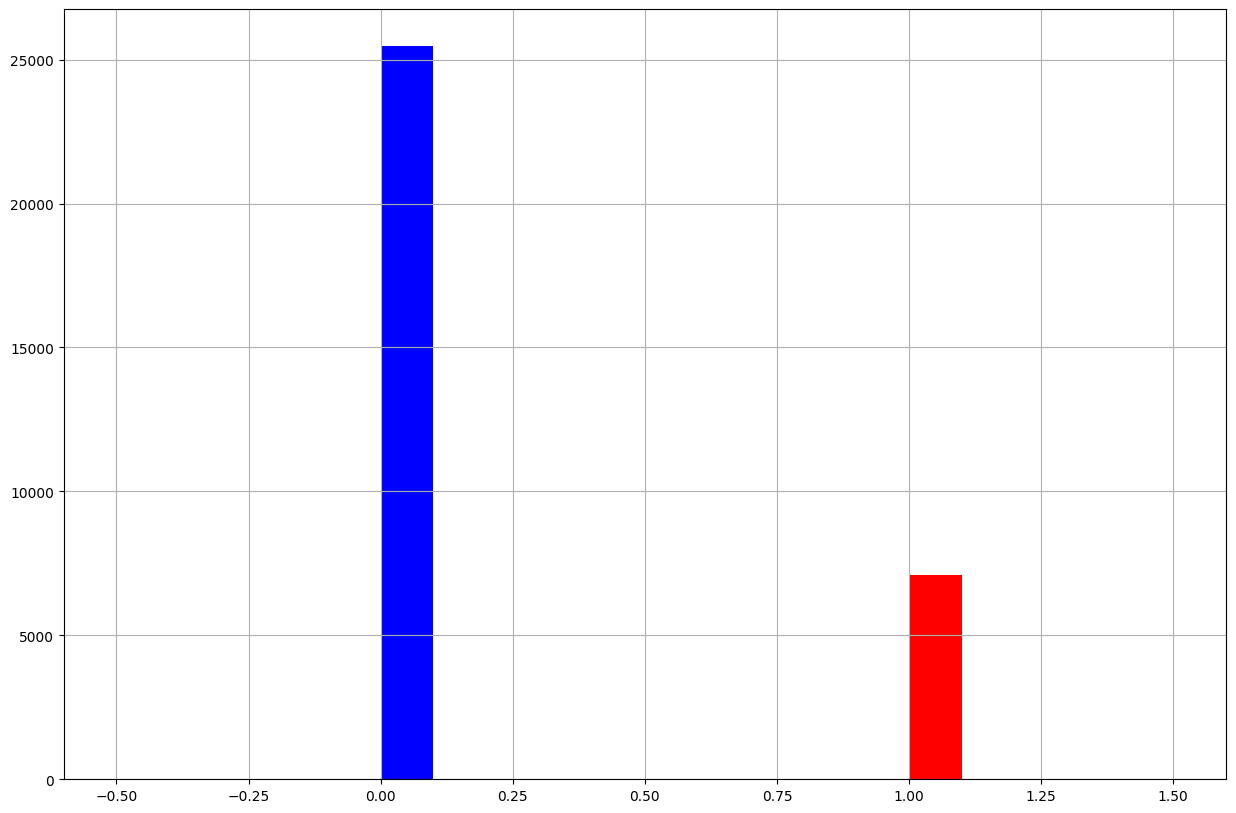

In [180]:
plt.figure(figsize=(15, 10))

base_credit[base_credit['loan_status'] == 0]['loan_status'].hist(
                                                color='blue',
                                                label='Pagou')
base_credit[base_credit['loan_status'] == 1]['loan_status'].hist(
                                                color='red',
                                                label='Não Pagou')

#### Visualizando a relação entre alguns atributos e a variável alvo

Visualizando a relação entre os aplicantes que pagaram (`loan_status == 0`) e não pagaram (`loan_status == 1`) entre o `loan_grade`:

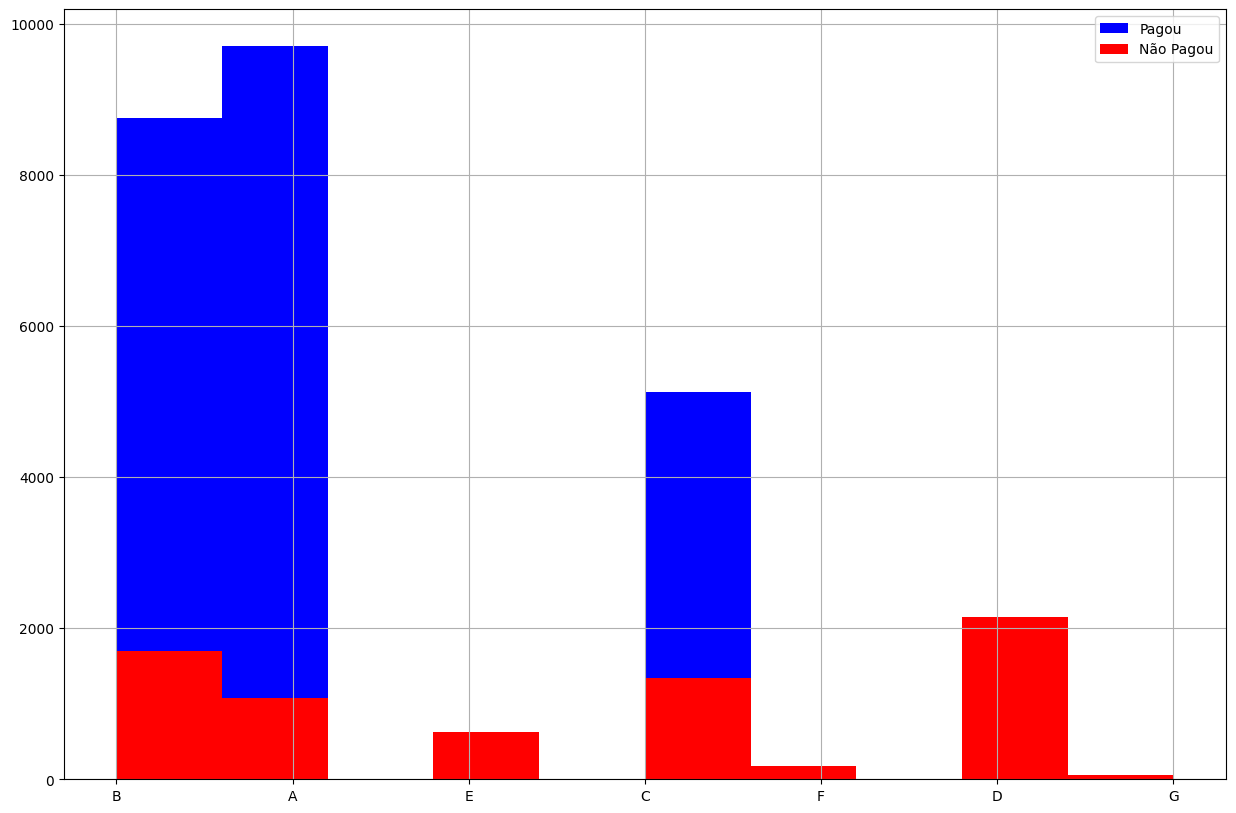

In [181]:
plt.figure(figsize=(15, 10))
base_credit[base_credit['loan_status'] == 0]['loan_grade'].hist(
                                                color='blue',
                                                label='Pagou')
base_credit[base_credit['loan_status'] == 1]['loan_grade'].hist(
                                                color='red',
                                                label='Não Pagou')
plt.legend()

Visualizando a relação entre os aplicantes que pagaram (`loan_status == 0`) e não pagaram (`loan_status == 1`) entre o histórico de inadimplência (`cb_person_default_on_file`):

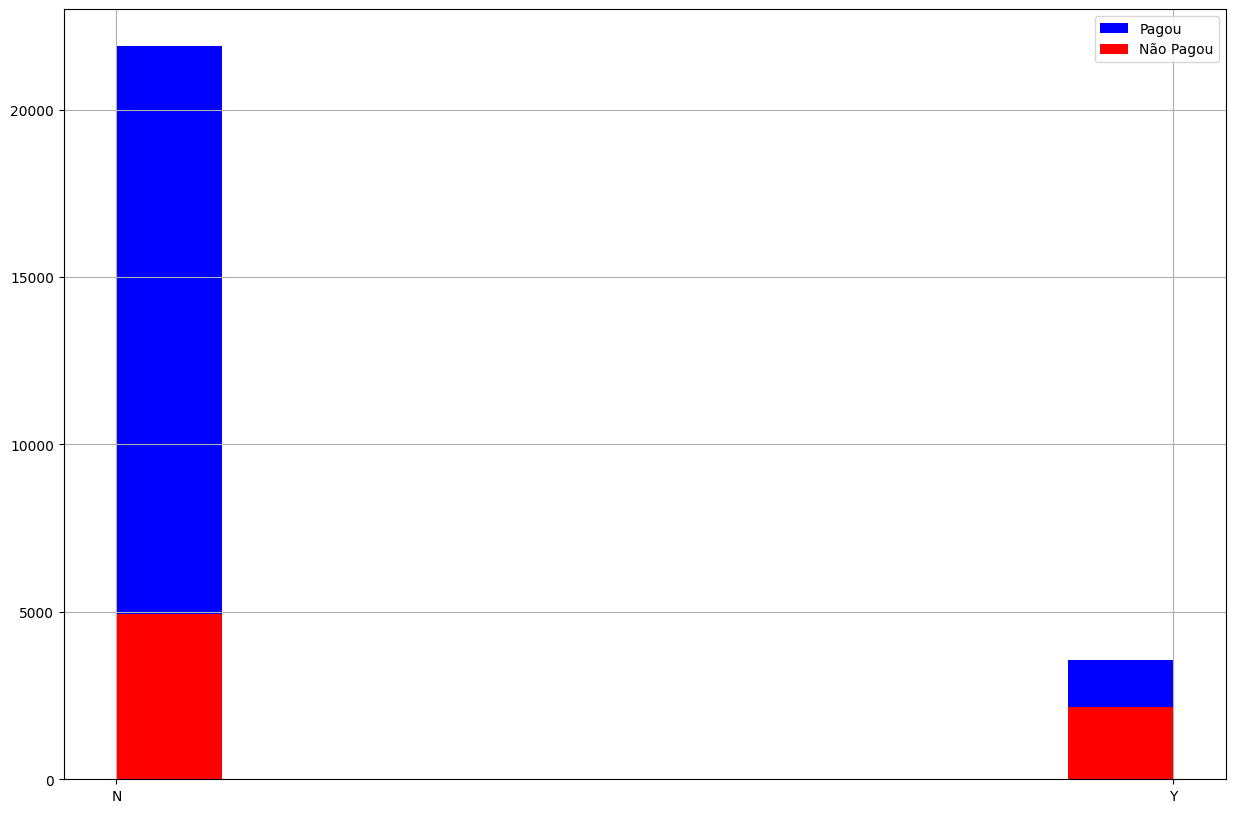

In [182]:
plt.figure(figsize=(15, 10))
base_credit[base_credit['loan_status'] == 0]['cb_person_default_on_file'].hist(
                                                color='blue',
                                                label='Pagou')
base_credit[base_credit['loan_status'] == 1]['cb_person_default_on_file'].hist(
                                                color='red',
                                                label='Não Pagou')
plt.legend()

Visualizando a relação entre os aplicantes que pagaram (`loan_status == 0`) e não pagaram (`loan_status == 1`) entre o a intenção do empréstimo (`loan_intent`):

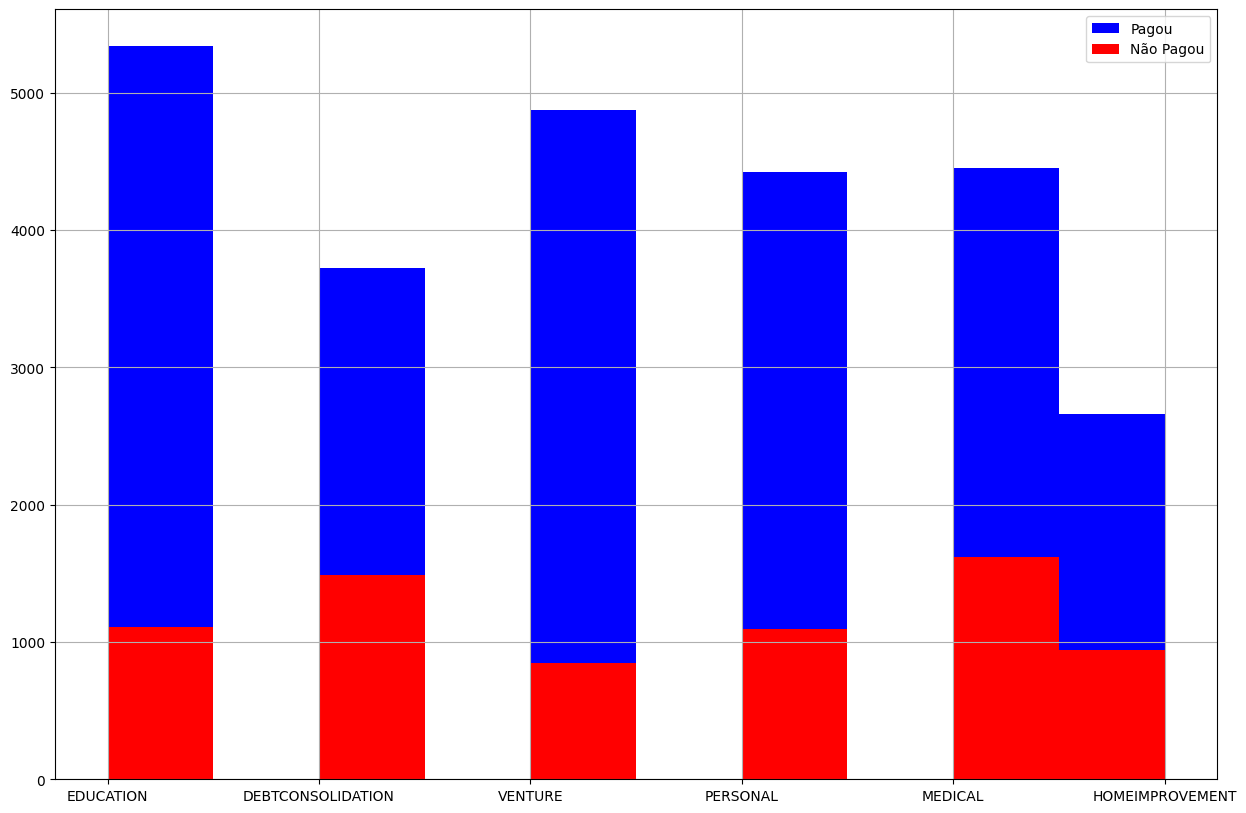

In [183]:
plt.figure(figsize=(15, 10))
base_credit[base_credit['loan_status'] == 0]['loan_intent'].hist(
                                                color='blue',
                                                label='Pagou')
base_credit[base_credit['loan_status'] == 1]['loan_intent'].hist(
                                                color='red',
                                                label='Não Pagou')
plt.legend()

Visualizando a relação entre os aplicantes que pagaram (loan_status == 0) e não pagaram (loan_status == 1) entre o a quantidade de anos empregado (`person_emp_length`):

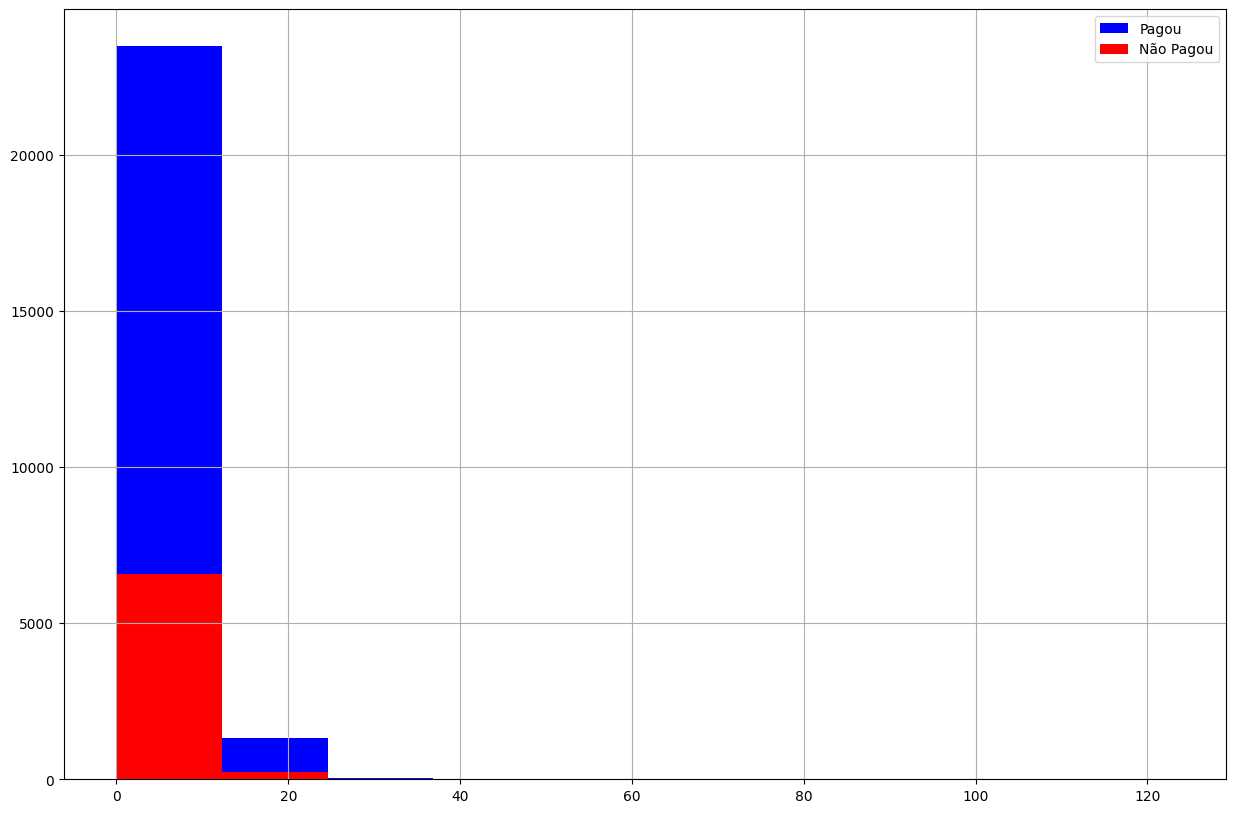

In [184]:
plt.figure(figsize=(15, 10))
base_credit[base_credit['loan_status'] == 0]['person_emp_length'].hist(
                                                color='blue',
                                                label='Pagou')
base_credit[base_credit['loan_status'] == 1]['person_emp_length'].hist(
                                                color='red',
                                                label='Não Pagou')
plt.legend()

Visualizando a relação entre os aplicantes que pagaram (loan_status == 0) e não pagaram (loan_status == 1) entre o juros (`loan_int_rate`):

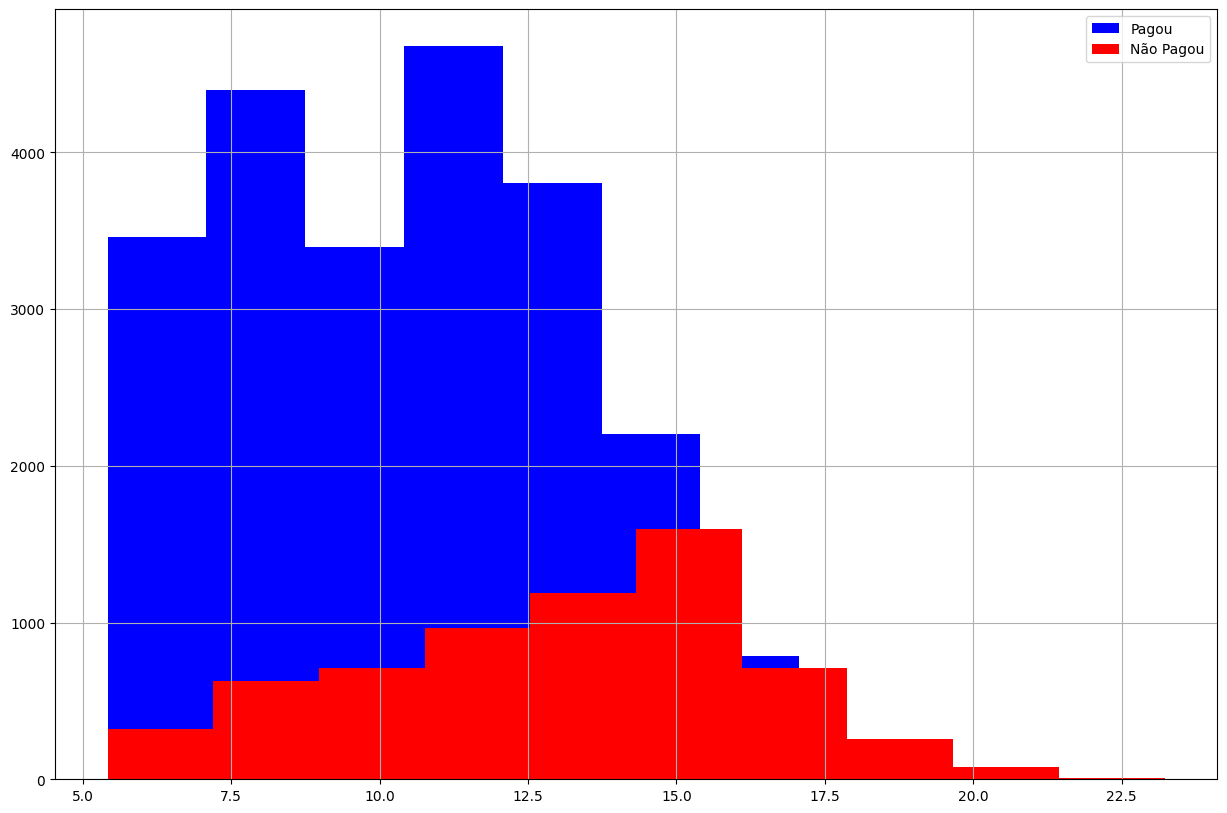

In [185]:
plt.figure(figsize=(15, 10))
base_credit[base_credit['loan_status'] == 0]['loan_int_rate'].hist(
                                                color='blue',
                                                label='Pagou')
base_credit[base_credit['loan_status'] == 1]['loan_int_rate'].hist(
                                                color='red',
                                                label='Não Pagou')
plt.legend()

Visualizando a relação entre os aplicantes que pagaram (loan_status == 0) e não pagaram (loan_status == 1) entre a taxa de endividamento em relação a renda anual (`loan_percent_income`):

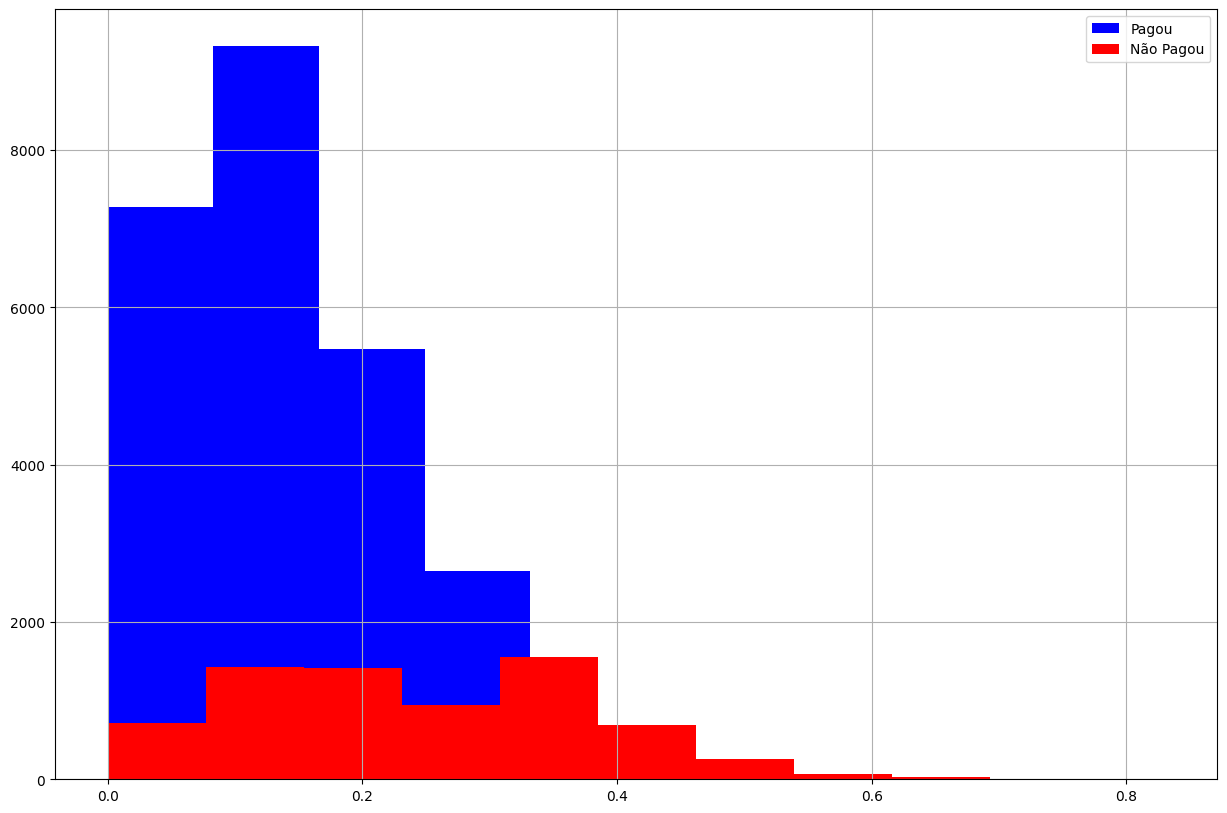

In [186]:
plt.figure(figsize=(15, 10))
base_credit[base_credit['loan_status'] == 0]['loan_percent_income'].hist(
                                                color='blue',
                                                label='Pagou')
base_credit[base_credit['loan_status'] == 1]['loan_percent_income'].hist(
                                                color='red',
                                                label='Não Pagou')
plt.legend()

#### Distribuição das variáveis numéricas

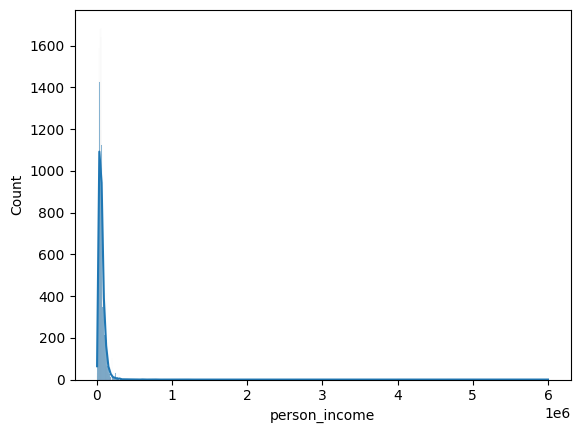

In [187]:
sns.histplot(base_credit['person_income'], kde=True)
plt.show()

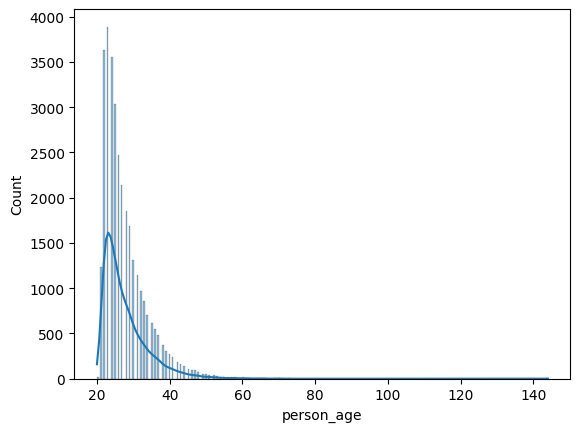

In [188]:
sns.histplot(base_credit['person_age'], kde=True)
plt.show()

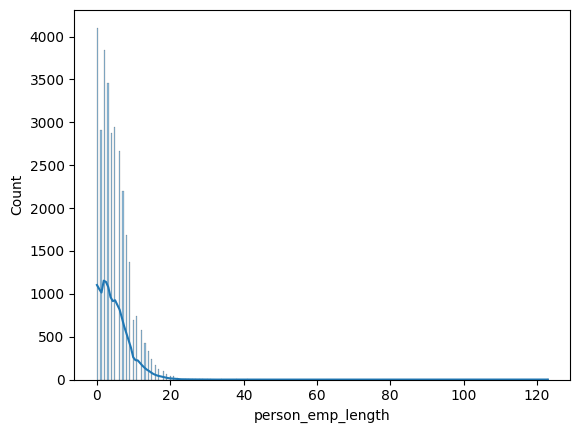

In [189]:
sns.histplot(base_credit['person_emp_length'], kde=True)
plt.show()

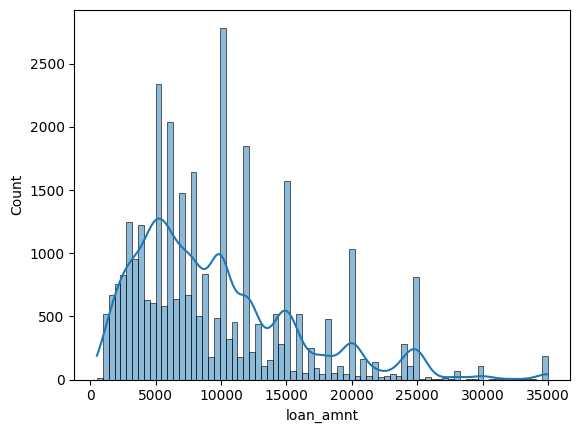

In [190]:
sns.histplot(base_credit['loan_amnt'], kde=True)
plt.show()

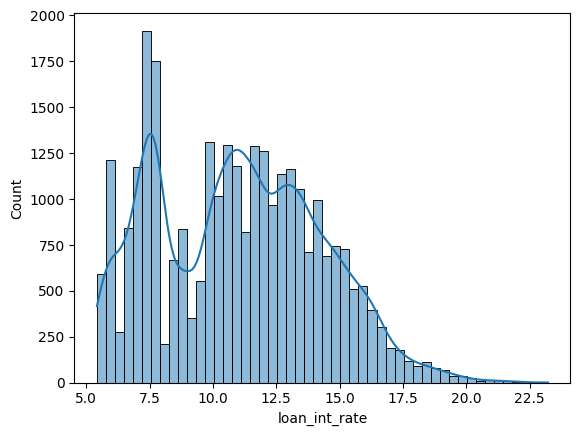

In [191]:
sns.histplot(base_credit['loan_int_rate'], kde=True)
plt.show()

## Tratamento dos dados

### Transformando as variáveis categóricas em numéricas

Conforme observado anteriormente, das quatro variáveis categóricas, três delas são nominais, sendo apenas `loan_grade` ordinal. Além disso, há multiplos valores em algumas as variáveis categóricas nominais (por exemplo `loan_intent`) o que pode influenciar no peso delas.

Dessa forma, é interesssante descartar a técnica `Label Encode` que consiste em mapear as variáveis em números. Ao invés dessa técnica, é interessante optar pela técnica `One Hot Encoder`



In [192]:
encoder = OneHotEncoder()

categorical_columns = ['person_home_ownership', 'loan_intent',
                       'loan_grade', 'cb_person_default_on_file']

encoded_data = encoder.fit_transform(base_credit[categorical_columns])

encoded_df = pd.DataFrame(encoded_data.toarray(),
                          columns=encoder.get_feature_names_out(categorical_columns))

base_credit_encoded = pd.concat([base_credit.drop(columns=categorical_columns), encoded_df], axis=1)

In [193]:
base_credit_encoded.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.166094,5.804211,0.412633,0.003284,...,0.175532,0.330776,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.823670,0.176330
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.107154,4.055001,0.492315,0.057214,...,0.380427,0.470500,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106,0.381106
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.080000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.140000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.220000,8.000000,1.000000,0.000000,...,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Tratamento dos dados outliers na idade e dados faltantes

Como os dados estão desbalanceados, é possível notar que os dados estão distribuídos em agrupamentos de categorias nominais. Portanto, é interessante usar o algoritimo KNN para preservar a distribuições entre as demais classes.

A primeira coisa é lidar com os dados outliers relacionados a idade, como sabemos que as pessoas que mais viveram no munndo - que se tem registros modernos - não passaram de 125 e que a moda deles é 115, então, vamos subtituir todos as idades acima de 115 por None e imputar a média do vizinho.

In [194]:
base_credit_encoded.loc[base_credit_encoded['person_age'] > 115, 'person_age'] = None


In [195]:
imputer = KNNImputer(n_neighbors=5)

base_credit_encoded_imputed = pd.DataFrame(imputer.fit_transform(base_credit_encoded),
                                           columns=base_credit_encoded.columns)

In [196]:
base_credit_encoded_imputed.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,...,32581.000000,32581.000000,32581.00000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.718812,6.607485e+04,4.769528,9589.371106,11.008869,0.218164,0.166094,5.804211,0.412633,0.003284,...,0.175532,0.330776,0.32077,0.198214,0.111292,0.029588,0.007397,0.001964,0.823670,0.176330
std,6.206020,6.198312e+04,4.100456,6322.086646,3.125589,0.413006,0.107154,4.055001,0.492315,0.057214,...,0.380427,0.470500,0.46678,0.398660,0.314498,0.169450,0.085688,0.044278,0.381106,0.381106
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.320000,0.000000,0.080000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.140000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.220000,0.000000,0.220000,8.000000,1.000000,0.000000,...,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,94.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
base_credit_encoded_imputed.isnull().sum()

,0
person_age,0
person_income,0
person_emp_length,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0
cb_person_cred_hist_length,0
person_home_ownership_MORTGAGE,0
person_home_ownership_OTHER,0


### Transformando as escalas dos dados

Entre nossa variáveis numéricas há números discretos e contínuos sendo evidente que a variável `loan_amnt` e `person_income` estão em escalas totalmente diferentes e causaram o modelo pesar diferente essa variáveis.

Portanto, precisamos colocar essas variáveis em uma mesma escala.

In [198]:
scaler = StandardScaler()

base_credit_encoded_imputed_standardized = base_credit_encoded_imputed.copy()

numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate',
                  'loan_percent_income', 'person_emp_length']
# Aplica o Standard Scaling
base_credit_encoded_imputed_standardized[numerical_cols] = scaler.fit_transform(base_credit_encoded_imputed_standardized[numerical_cols])

In [199]:
base_credit_encoded_imputed_standardized

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,-0.921508,-0.114143,28.833935,4.019404,1.603284,1.0,3.956114,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-1.082645,-0.911147,0.056207,-1.358650,0.041955,0.0,-0.616821,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.438099,-0.911147,-0.919309,-0.646849,0.595459,1.0,3.769463,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.760372,-0.009274,-0.187672,4.019404,1.350528,1.0,3.396163,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.599236,-0.188358,0.787844,4.019404,1.043381,1.0,4.422740,4.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.718264,-0.210945,-0.919309,-0.599395,0.688243,0.0,-0.616821,30.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32577,4.234855,0.870011,-0.187672,1.271060,-1.125843,0.0,-0.243520,19.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32578,6.007355,0.160129,-0.431551,4.019404,-0.006037,1.0,2.742886,28.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32579,4.557127,1.354021,0.056207,0.855843,0.150736,0.0,-0.616821,26.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Engenharia de features da base de dados

Para selecionar as features para o treinamento do modelo vou voltar um passo e fazer um `label encoder` para visualizar melhor as variáveis da base dados e determinar quais são as variáveis mais correlacionadas a `loan_status`

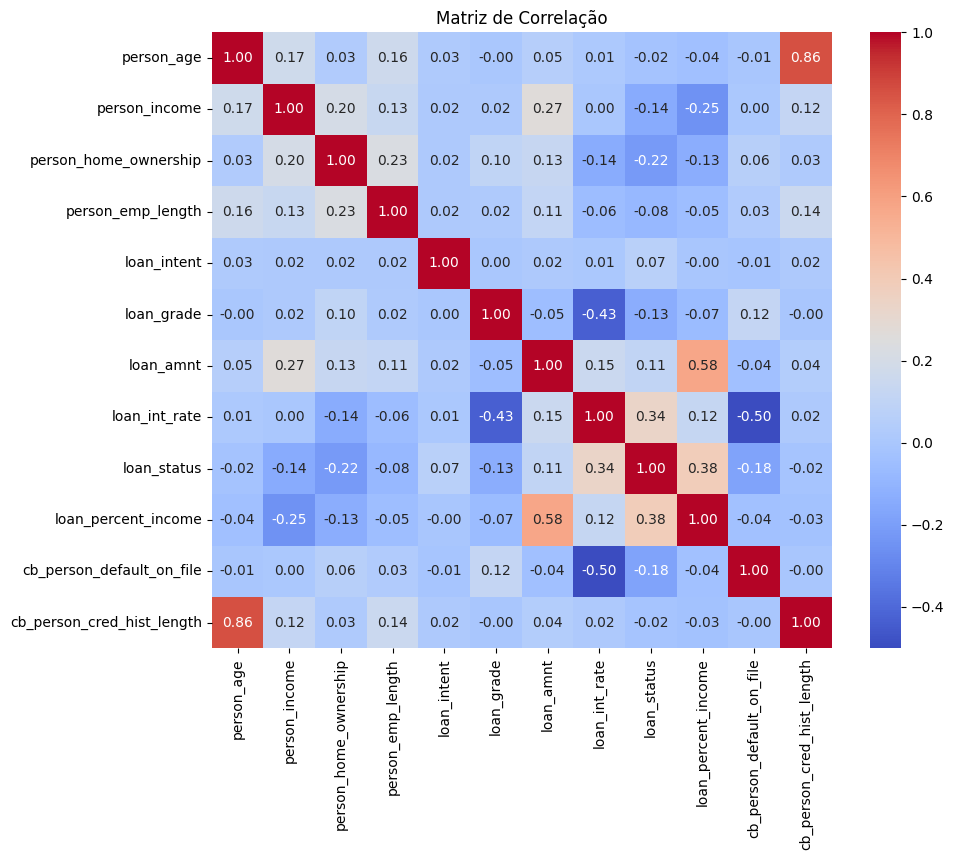

In [200]:
loan_intent_mapping = {
    'PERSONAL': 0,
    'EDUCATION': 1,
    'MEDICAL': 2,
    'VENTURE': 3,
    'HOMEIMPROVEMENT': 4,
    'DEBTCONSOLIDATION': 5
}

loan_grade_mapping = {
    'D': 0,
    'B': 1,
    'C': 2,
    'A': 3,
    'E': 4,
    'F': 5,
    'G': 6
}

loan_status_mapping = {
    0: 0,
    1: 1
}

cb_person_default_on_file_mapping = {
    'Y': 0,
    'N': 1
}

person_home_ownership_mapping = {
    'RENT': 0,
    'OWN': 1,
    'MORTGAGE': 2,
    'OTHER': 3
}


base_credit_2 = base_credit.copy()
# Mapeando cada coluna usando apply() + map()
base_credit_2['loan_intent'] = base_credit_2['loan_intent'].map(loan_intent_mapping)
base_credit_2['loan_grade'] = base_credit_2['loan_grade'].map(loan_grade_mapping)
base_credit_2['loan_status'] = base_credit_2['loan_status'].map(loan_status_mapping)
base_credit_2['cb_person_default_on_file'] = base_credit_2['cb_person_default_on_file'].map(cb_person_default_on_file_mapping)
base_credit_2['person_home_ownership'] = base_credit_2['person_home_ownership'].map(person_home_ownership_mapping)


base_credit_corr = base_credit_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(base_credit_corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

Com base no gráfico acima podemos selecionar as seguintes variáveis pelo seu grau de correlação:

|Feature|Correlação|
|-|-|
|`loan_grade`|negativa moderada|
|`loan_amnt`|positiva leve|
|`loan_int_rate`|positiva moderada|
|`loan_percent_income`|positiva moderada|
|`cb_person_default_on_file`|negativa moderada|

Ademais, vale a pena selecionar as seguintes variáveis para um modelo alternativo e testar quais performaram melhor:

|Feature|Correlação|
|-|-|
|`loan_intent`| positiva fraca|
|`person_emp_length:`|positiva fraca|

As demais serão descartadas para evitar o enviesamento do modelo.

In [201]:
features_cols = ['loan_grade_A','loan_grade_B','loan_grade_C',
                 'loan_grade_D','loan_grade_E','loan_grade_F',
                 'loan_grade_G','loan_amnt', 'loan_int_rate',
                 'loan_percent_income', 'cb_person_default_on_file_Y']

features = base_credit_encoded_imputed_standardized[features_cols]
target = base_credit_encoded_imputed_standardized['loan_status']


features_cols_2 = ['loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
                   'loan_intent_MEDICAL', 'loan_intent_PERSONAL',
                   'loan_intent_VENTURE', 'person_emp_length']
features_2 = base_credit_encoded_imputed_standardized[features_cols + features_cols_2]

In [202]:
features_2

,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file_Y,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_emp_length
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.019404,1.603284,3.956114,1.0,0.0,0.0,0.0,1.0,0.0,28.833935
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.358650,0.041955,-0.616821,0.0,1.0,0.0,0.0,0.0,0.0,0.056207
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.646849,0.595459,3.769463,0.0,0.0,0.0,1.0,0.0,0.0,-0.919309
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.019404,1.350528,3.396163,0.0,0.0,0.0,1.0,0.0,0.0,-0.187672
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.019404,1.043381,4.422740,1.0,0.0,0.0,1.0,0.0,0.0,0.787844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.599395,0.688243,-0.616821,0.0,0.0,0.0,0.0,1.0,0.0,-0.919309
32577,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.271060,-1.125843,-0.243520,0.0,0.0,0.0,0.0,1.0,0.0,-0.187672
32578,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.019404,-0.006037,2.742886,0.0,0.0,1.0,0.0,0.0,0.0,-0.431551
32579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.855843,0.150736,-0.616821,0.0,0.0,0.0,0.0,1.0,0.0,0.056207


## Treinamento do Modelo

Para o treinamento de modelo iremos testar dois modelos de `Random Florest` e `Decision Tree` e faremos os seguintes testes para cada modelo

- `features` + SMOTE
- `features` S/ SMOT
- `features` + `features_2` + SMOTE
- `features` + `features_2` S/ SMOTE

E depois, determinaremos qual é o melhor modelo para o fins desse treinamento. A métrica para definir o sucesso do treinamento será a maior acurácia em determinar possíveis caloteiros (classe `loan_status == 1`) e menores falso positivos para essa classe.

In [299]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# com features + loan_intent + person_emp_length
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target, test_size=0.2, random_state=42)

A função abaixo servirá para ilustrar a matrix de confusão de cada modelo:

In [300]:
def plot_confusion_matrix(cm, model_name):
  """
  Plot a confusion matrix of model

  :param cm: confusion matrix
  :param model_name: name of model
  """
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
  plt.title(f'Matriz de Confusão - {model_name}')
  plt.xlabel('Predito')
  plt.ylabel('Real')
  plt.show()

Abbaixo temos os modelos que iremos usar para o treinamento:

In [301]:
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

A técnica SMOTE será aplicada para aumentar fazer um `oversampling` da classe minoritária assim evitaremos o enviesamento em determinar os aplicantes como bons pagadores - já que a base de dados só possui cerca de 21% de inadimplentes.

In [302]:
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled_2, y_train_resampled_2 = smote.fit_resample(X_train_2, y_train_2)

In [303]:
model_results_track = results_df = pd.DataFrame(columns=[
        "model", "smote", "TN", "FP", "FN", "TP",
        "accuracy", "loan_intent_and_emp_length",
        "precision_0", "recall_0", "f1_score_0",
        "precision_1", "recall_1", "f1_score_1",
        "macro_avg_precision", "macro_avg_recall",
        "macro_avg_f1", "weighted_avg_precision",
        "weighted_avg_recall", "weighted_avg_f1",
        "hypeparameters"
])

def update_model_result_track(original_dataframe: pd.DataFrame,
                              model_name: str, smote: bool,
                              loan_intent_and_emp_length: bool,
                              y_true: np.ndarray,
                              y_pred: np.ndarray,
                              hyperparameters: Optional[Dict] = None):
    """
    Updates a DataFrame with model performance metrics, including confusion matrix values and classification report.

    Parameters:
        - original_dataframe (pd.DataFrame): DataFrame where results will be stored.
        - model_name (str): The name of the model used.
        - smote (bool): Indicates whether SMOTE was applied.
        - loan_intent_and_emp_length (bool): Indicates whether `loan_intent` and `emp_length` were used as features.
        - y_true (np.ndarray): True labels.
        - y_pred (np.ndarray): Predicted labels.

    Returns:
        - pd.DataFrame: Updated DataFrame with new results.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)

    # Compute the classification report
    report = classification_report(y_true, y_pred, labels=[0, 1], output_dict=True)

    # Extract metrics safely
    precision_0 = report.get("0", {}).get("precision", None)
    recall_0 = report.get("0", {}).get("recall", None)
    f1_score_0 = report.get("0", {}).get("f1-score", None)

    precision_1 = report.get("1", {}).get("precision", None)
    recall_1 = report.get("1", {}).get("recall", None)
    f1_score_1 = report.get("1", {}).get("f1-score", None)

    # Extract macro and weighted averages
    macro_avg_precision = report.get("macro avg", {}).get("precision", None)
    macro_avg_recall = report.get("macro avg", {}).get("recall", None)
    macro_avg_f1 = report.get("macro avg", {}).get("f1-score", None)

    weighted_avg_precision = report.get("weighted avg", {}).get("precision", None)
    weighted_avg_recall = report.get("weighted avg", {}).get("recall", None)
    weighted_avg_f1 = report.get("weighted avg", {}).get("f1-score", None)

    # Compute accuracy manually
    total_samples = tp + tn + fp + fn
    accuracy = (tp + tn) / total_samples if total_samples > 0 else None

    # Create a new row of data
    new_row = {
        "model": model_name,
        "smote": smote,
        "loan_intent_and_emp_length": loan_intent_and_emp_length,
        "TN": tn,
        "FP": fp,
        "FN": fn,
        "TP": tp,
        "accuracy": accuracy,
        "precision_0": precision_0,
        "recall_0": recall_0,
        "f1_score_0": f1_score_0,
        "precision_1": precision_1,
        "recall_1": recall_1,
        "f1_score_1": f1_score_1,
        "macro_avg_precision": macro_avg_precision,
        "macro_avg_recall": macro_avg_recall,
        "macro_avg_f1": macro_avg_f1,
        "weighted_avg_precision": weighted_avg_precision,
        "weighted_avg_recall": weighted_avg_recall,
        "weighted_avg_f1": weighted_avg_f1,
        "hypeparameters": hyperparameters
    }

    # Update the original DataFrame with the new row
    updated_dataframe = pd.concat([original_dataframe, pd.DataFrame([new_row])], ignore_index=True)

    return updated_dataframe

### Random Forest

Para fazer o `fine tuning` dos híper parâmetros iremos testar os seguinte grid:

In [304]:
rf_param_grid = {
    'n_estimators': [50,100, 150],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

#### Sem SMOTE

##### Somente com as features com boa correlação

In [305]:
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

Gráfico da matrix de confusão desse modelo:

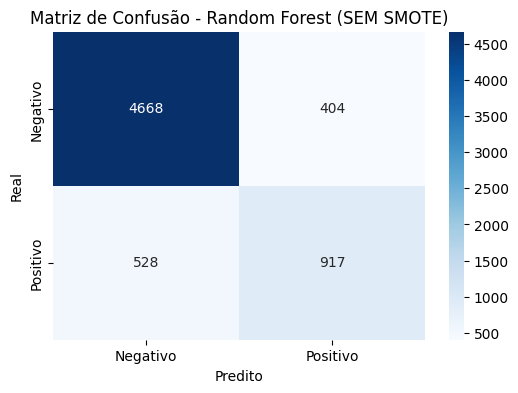

In [306]:
plot_confusion_matrix(cm_rf, "Random Forest (SEM SMOTE)")

In [307]:
print("Relatório de Classificação - Random Forest (SEM SMOTE):")
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação - Random Forest (SEM SMOTE):
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91      5072
         1.0       0.69      0.63      0.66      1445

    accuracy                           0.86      6517
   macro avg       0.80      0.78      0.79      6517
weighted avg       0.85      0.86      0.85      6517



In [308]:
model_results_track = update_model_result_track(original_dataframe=model_results_track,
                          model_name="Random Forest",
                          smote=False,
                          loan_intent_and_emp_length=False,
                          y_true=y_test,
                          y_pred=y_pred_rf
                          )

<ipython-input-303-83ac4647eb05>:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  updated_dataframe = pd.concat([original_dataframe, pd.DataFrame([new_row])], ignore_index=True)


##### Com features de `loan_intent` e `person_emp_length`

In [309]:
rf_model.fit(X_train_2, y_train_2)

y_pred_rf = rf_model.predict(X_test_2)

cm_rf = confusion_matrix(y_test, y_pred_rf)

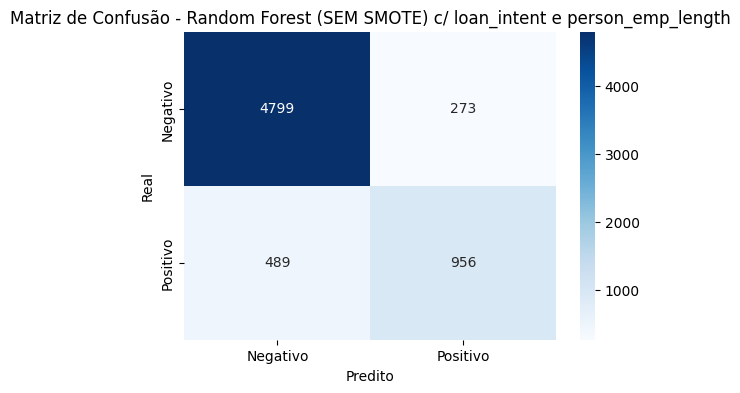

In [310]:
plot_confusion_matrix(cm_rf, "Random Forest (SEM SMOTE) c/ loan_intent e person_emp_length")

In [311]:
print("Relatório de Classificação - Random Forest (SEM SMOTE) c/ loan_intent e person_emp_length:")
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação - Random Forest (SEM SMOTE) c/ loan_intent e person_emp_length:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93      5072
         1.0       0.78      0.66      0.72      1445

    accuracy                           0.88      6517
   macro avg       0.84      0.80      0.82      6517
weighted avg       0.88      0.88      0.88      6517



In [312]:
model_results_track = update_model_result_track(original_dataframe=model_results_track,
                          model_name="Random Forest",
                          smote=False, loan_intent_and_emp_length=True,
                          y_true=y_test, y_pred=y_pred_rf)

In [313]:
model_results_track

,model,smote,TN,FP,FN,TP,accuracy,loan_intent_and_emp_length,precision_0,recall_0,...,precision_1,recall_1,f1_score_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1,hypeparameters
0,Random Forest,False,4668,404,528,917,0.856989,False,0.898383,0.920347,...,0.694171,0.634602,0.663051,0.796277,0.777475,0.786142,0.853104,0.856989,0.854647,None
1,Random Forest,False,4799,273,489,956,0.883075,True,0.907526,0.946175,...,0.777868,0.661592,0.715034,0.842697,0.803883,0.820741,0.878778,0.883075,0.879571,None


#### Com SMOTE

##### Somente com as features com boa correlação

In [314]:
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

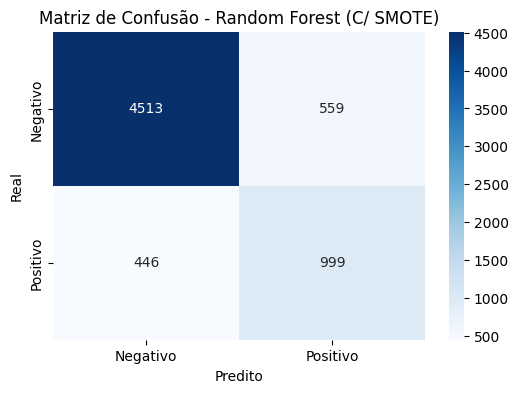

In [315]:
plot_confusion_matrix(cm_rf, "Random Forest (C/ SMOTE)")

In [316]:
print("Relatório de Classificação - Random Forest (C/ SMOTE):")
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação - Random Forest (C/ SMOTE):
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      5072
         1.0       0.64      0.69      0.67      1445

    accuracy                           0.85      6517
   macro avg       0.78      0.79      0.78      6517
weighted avg       0.85      0.85      0.85      6517



In [317]:
model_results_track = update_model_result_track(original_dataframe=model_results_track,
                          model_name="Random Forest",
                          smote=True, loan_intent_and_emp_length=False,
                          y_true=y_test, y_pred=y_pred_rf)

##### Com features de `loan_intent` e `person_emp_length`

In [318]:
rf_model.fit(X_train_resampled_2, y_train_resampled_2)

y_pred_rf = rf_model.predict(X_test_2)

cm_rf = confusion_matrix(y_test, y_pred_rf)

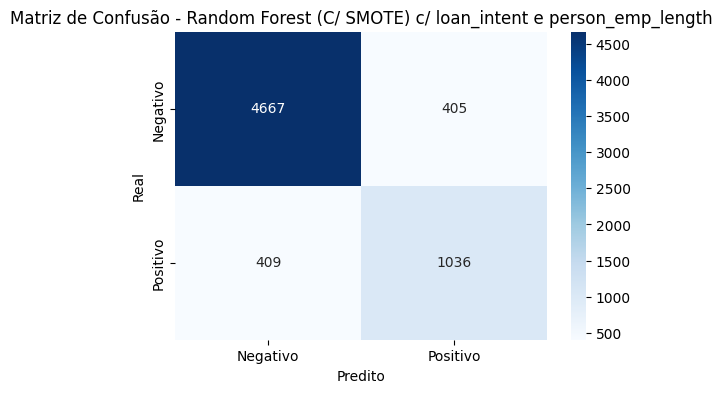

In [319]:
plot_confusion_matrix(cm_rf, "Random Forest (C/ SMOTE)" + " c/ loan_intent e person_emp_length")

In [320]:
print("Relatório de Classificação - Random Forest (C/ SMOTE) c/ loan_intent e person_emp_length:")
print(classification_report(y_test, y_pred_rf))

Relatório de Classificação - Random Forest (C/ SMOTE) c/ loan_intent e person_emp_length:
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      5072
         1.0       0.72      0.72      0.72      1445

    accuracy                           0.88      6517
   macro avg       0.82      0.82      0.82      6517
weighted avg       0.87      0.88      0.88      6517



In [321]:
model_results_track = update_model_result_track(original_dataframe=model_results_track,
                          model_name="Random Forest",
                          smote=True, loan_intent_and_emp_length=True,
                          y_true=y_test, y_pred=y_pred_rf)

### Decision Tree

Para fazer o fine tuning dos híper parâmetros iremos testar os seguinte grid:

In [322]:
dt_param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Remover 'auto' e usar valores válidos
}

#### Sem SMOTE

##### Somente com as features com boa correlação

In [323]:
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

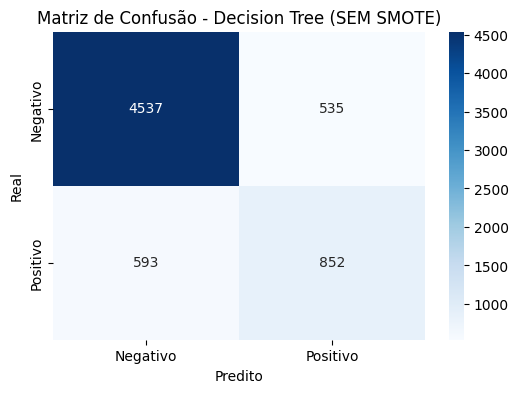

In [324]:
plot_confusion_matrix(cm_dt, "Decision Tree (SEM SMOTE)")

In [325]:
print("Relatório de Classificação - Decision Tree (SEM SMOTE):")
print(classification_report(y_test, y_pred_dt))

Relatório de Classificação - Decision Tree (SEM SMOTE):
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      5072
         1.0       0.61      0.59      0.60      1445

    accuracy                           0.83      6517
   macro avg       0.75      0.74      0.75      6517
weighted avg       0.82      0.83      0.83      6517



In [326]:
model_results_track = update_model_result_track(original_dataframe=model_results_track,
                          model_name="Decision Tree",
                          smote=False, loan_intent_and_emp_length=False,
                          y_true=y_test, y_pred=y_pred_dt)

##### Com features de `loan_intent` e `person_emp_length`

In [327]:
dt_model.fit(X_train_2, y_train_2)
y_pred_dt = dt_model.predict(X_test_2)
cm_dt = confusion_matrix(y_test, y_pred_dt)

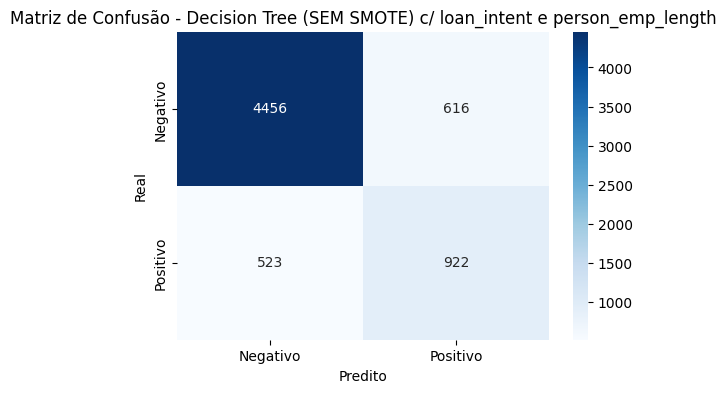

In [328]:
plot_confusion_matrix(cm_dt, "Decision Tree (SEM SMOTE) c/ loan_intent e person_emp_length")

In [329]:
print("Relatório de Classificação - Decision Tree (SEM SMOTE) c/ loan_intent e person_emp_length:")
print(classification_report(y_test, y_pred_dt))

Relatório de Classificação - Decision Tree (SEM SMOTE) c/ loan_intent e person_emp_length:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.89      5072
         1.0       0.60      0.64      0.62      1445

    accuracy                           0.83      6517
   macro avg       0.75      0.76      0.75      6517
weighted avg       0.83      0.83      0.83      6517



In [330]:
model_results_track = update_model_result_track(original_dataframe=model_results_track,
                          model_name="Decision Tree",
                          smote=False, loan_intent_and_emp_length=True,
                          y_true=y_test, y_pred=y_pred_dt)

#### Com SMOTE

##### Somente com as features com boa correlação

In [331]:
dt_model.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_model.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

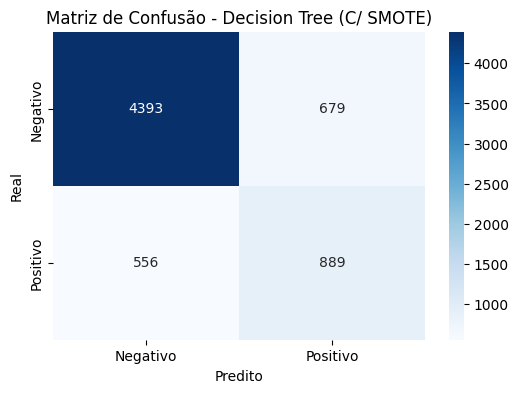

In [332]:
plot_confusion_matrix(cm_dt, "Decision Tree (C/ SMOTE)")

In [333]:
print("Relatório de Classificação - Decision Tree (C/ SMOTE):")
print(classification_report(y_test, y_pred_dt))

Relatório de Classificação - Decision Tree (C/ SMOTE):
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      5072
         1.0       0.57      0.62      0.59      1445

    accuracy                           0.81      6517
   macro avg       0.73      0.74      0.73      6517
weighted avg       0.82      0.81      0.81      6517



In [334]:
model_results_track = update_model_result_track(original_dataframe=model_results_track,
                          model_name="Decision Tree",
                          smote=True, loan_intent_and_emp_length=False,
                          y_true=y_test, y_pred=y_pred_dt)

##### Com features de `loan_intent` e `person_emp_length`

In [335]:
dt_model.fit(X_train_resampled_2, y_train_resampled_2)
y_pred_dt = dt_model.predict(X_test_2)
cm_dt = confusion_matrix(y_test, y_pred_dt)

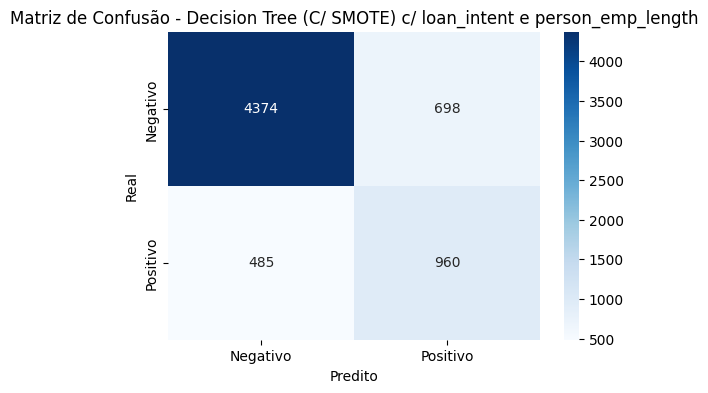

In [336]:
plot_confusion_matrix(cm_dt, "Decision Tree (C/ SMOTE) c/ loan_intent e person_emp_length")

In [337]:
print("Relatório de Classificação - Decision Tree (C/ SMOTE) c/ loan_intent e person_emp_length:")
print(classification_report(y_test, y_pred_dt))

Relatório de Classificação - Decision Tree (C/ SMOTE) c/ loan_intent e person_emp_length:
              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      5072
         1.0       0.58      0.66      0.62      1445

    accuracy                           0.82      6517
   macro avg       0.74      0.76      0.75      6517
weighted avg       0.83      0.82      0.82      6517



In [338]:
model_results_track = update_model_result_track(original_dataframe=model_results_track,
                          model_name="Decision Tree",
                          smote=True, loan_intent_and_emp_length=True,
                          y_true=y_test, y_pred=y_pred_dt)

In [339]:
model_results_track

,model,smote,TN,FP,FN,TP,accuracy,loan_intent_and_emp_length,precision_0,recall_0,...,precision_1,recall_1,f1_score_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1,hypeparameters
0,Random Forest,False,4668,404,528,917,0.856989,False,0.898383,0.920347,...,0.694171,0.634602,0.663051,0.796277,0.777475,0.786142,0.853104,0.856989,0.854647,None
1,Random Forest,False,4799,273,489,956,0.883075,True,0.907526,0.946175,...,0.777868,0.661592,0.715034,0.842697,0.803883,0.820741,0.878778,0.883075,0.879571,None
2,Random Forest,True,4513,559,446,999,0.845788,False,0.910063,0.889787,...,0.641207,0.691349,0.665335,0.775635,0.790568,0.782573,0.850450,0.845788,0.847821,None
3,Random Forest,True,4667,405,409,1036,0.875096,True,0.919425,0.920150,...,0.718945,0.716955,0.717949,0.819185,0.818552,0.818868,0.874973,0.875096,0.875034,None
4,Decision Tree,False,4537,535,593,852,0.826914,False,0.884405,0.894519,...,0.614275,0.589619,0.601695,0.749340,0.742069,0.745564,0.824510,0.826914,0.825634,None
5,Decision Tree,False,4456,616,523,922,0.825226,True,0.894959,0.878549,...,0.599480,0.638062,0.618170,0.747219,0.758306,0.752424,0.829443,0.825226,0.827142,None
6,Decision Tree,True,4393,679,556,889,0.810496,False,0.887654,0.866128,...,0.566964,0.615225,0.590110,0.727309,0.740676,0.733434,0.816548,0.810496,0.813201,None
7,Decision Tree,True,4374,698,485,960,0.818475,True,0.900185,0.862382,...,0.579011,0.664360,0.618756,0.739598,0.763371,0.749817,0.828972,0.818475,0.822758,None


## Ajuste fino dos híper parâmetros

In [244]:
rf_params = []
dt_params = []

#### Modelo Random Forest

In [245]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train, y_train)

print("Melhor configuração para Random Forest (S SMOTE):", rf_grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Melhor configuração para Random Forest (S SMOTE): {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [246]:
rf_params.append({
    "model": "Random Forest",
    "smote": False,
    "loan_intent_and_emp_length": False,
    "hyperparameters": rf_grid_search.best_params_
})

In [247]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_2, y_train_2)

print("Melhor configuração para Random Forest (SEM SMOTE) c/ loen_intent e person_emp_length:", rf_grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhor configuração para Random Forest (SEM SMOTE) c/ loen_intent e person_emp_length: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [248]:
rf_params.append({
    "model": "Random Forest",
    "smote": False,
    "loan_intent_and_emp_length": True,
    "hyperparameters": rf_grid_search.best_params_
})

In [249]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print("Melhor configuração para Random Forest (C SMOTE):", rf_grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhor configuração para Random Forest (C SMOTE): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [250]:
rf_params.append({
    "model": "Random Forest",
    "smote": True,
    "loan_intent_and_emp_length": False,
    "hyperparameters": rf_grid_search.best_params_
})

In [251]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_resampled_2, y_train_resampled_2)

print("Melhor configuração para Random Forest (C SMOTE) c/ loen_intent e person_emp_length:", rf_grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhor configuração para Random Forest (C SMOTE) c/ loen_intent e person_emp_length: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [252]:
rf_params.append({
    "model": "Random Forest",
    "smote": True,
    "loan_intent_and_emp_length": True,
    "hyperparameters": rf_grid_search.best_params_
})

#### Decision Tree

In [253]:
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train, y_train)

print("Melhor configuração para Decision Tree (S SMOTE):", dt_grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhor configuração para Decision Tree (S SMOTE): {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [254]:
dt_params.append({
    "model": "Decision Tree",
    "smote": False,
    "loan_intent_and_emp_length": False,
    "hyperparameters": dt_grid_search.best_params_
})

In [255]:
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train_2, y_train_2)

print("Melhor configuração para Decision Tree (SEM SMOTE) c/ loen_intent e person_emp_length:", dt_grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhor configuração para Decision Tree (SEM SMOTE) c/ loen_intent e person_emp_length: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [256]:
dt_params.append({
    "model": "Decision Tree",
    "smote": False,
    "loan_intent_and_emp_length": True,
    "hyperparameters": dt_grid_search.best_params_
})

In [257]:
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train_resampled, y_train_resampled)

print("Melhor configuração para Decision Tree (C SMOTE):", dt_grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhor configuração para Decision Tree (C SMOTE): {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [258]:
dt_params.append({
    "model": "Decision Tree",
    "smote": True,
    "loan_intent_and_emp_length": False,
    "hyperparameters": dt_grid_search.best_params_
})

In [259]:
dt_grid_search = GridSearchCV(estimator=dt_model, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=1)
dt_grid_search.fit(X_train_resampled_2, y_train_resampled_2)

print("Melhor configuração para Decision Tree (C SMOTE) c/ loen_intent e person_emp_length:", dt_grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhor configuração para Decision Tree (C SMOTE) c/ loen_intent e person_emp_length: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [260]:
dt_params.append({
    "model": "Decision Tree",
    "smote": True,
    "loan_intent_and_emp_length": True,
    "hyperparameters": dt_grid_search.best_params_
})

### Treinando modelos

In [266]:
def train_fine_tune_model(model_name: str, smote: bool,
                          loan_intent_and_emp_length: bool,
                          hyperparameters: Dict,
                          X_train, y_train, X_test, y_test,
                          original_dataframe):
  if model_name not in ['Decision Tree', 'Random Forest']:
    raise ValueError("Model name must be 'Decision Tree' or 'Random Forest'.")

  if y_train is None:
      raise ValueError("Training labels (y_train) cannot be None.")
  if X_train is None:
      raise ValueError("Training features (X_train) cannot be None.")

  model = DecisionTreeClassifier(**hyperparameters) if model_name == "Decision Tree" else RandomForestClassifier(**hyperparameters)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)


  return update_model_result_track(original_dataframe=original_dataframe,
                                   model_name=model_name, smote=smote,
                                   loan_intent_and_emp_length=loan_intent_and_emp_length,
                                   y_true=y_test, y_pred=y_pred,
                                   hyperparameters=hyperparameters)

In [298]:
def fine_tune(params, original_dataframe):
    """
    Function to train and fine-tune models based on the provided parameters.

    Parameters:
    - params (list): List of dictionaries containing the parameters for each model training.
    - original_dataframe (DataFrame): DataFrame to store the results of the fine-tuned models.

    Returns:
    - original_dataframe (DataFrame): DataFrame with the updated results of the model training.
    """
    for param in params:
        # Defining variables for training and testing
        param_X_train = None
        param_X_test = None
        param_y_train = None
        param_y_test = y_test_2 if param['loan_intent_and_emp_length'] else y_test

        # Choosing the dataset based on the parameters
        if param['loan_intent_and_emp_length']:
            param_X_train = X_train_resampled_2 if param['smote'] else X_train_2
            param_X_test = X_test_2
            param_y_train = y_train_resampled_2 if param['smote'] else y_train_2
        else:
            param_X_test = X_test
            param_X_train = X_train_resampled if param['smote'] else X_train
            param_y_train = y_train_resampled if param['smote'] else y_train

        # Checking if training and testing variables are not None
        if param_X_train is None or param_y_train is None or param_X_test is None or param_y_test is None:
            raise ValueError("One of the training or testing variables is incorrectly defined (None).")

        # Training and fine-tuning the model
        original_dataframe = train_fine_tune_model(
            model_name=param['model'],
            loan_intent_and_emp_length=param['loan_intent_and_emp_length'],
            hyperparameters=param['hyperparameters'],
            smote=param['smote'],
            X_train=param_X_train, y_train=param_y_train,
            X_test=param_X_test, y_test=param_y_test,
            original_dataframe=original_dataframe
        )

    return original_dataframe

In [297]:
dt_params

[{'model': 'Decision Tree',
  'smote': False,
  'loan_intent_and_emp_length': False,
  'hyperparameters': {'max_depth': 10,
   'max_features': None,
   'min_samples_leaf': 1,
   'min_samples_split': 5}},
 {'model': 'Decision Tree',
  'smote': False,
  'loan_intent_and_emp_length': True,
  'hyperparameters': {'max_depth': 10,
   'max_features': None,
   'min_samples_leaf': 2,
   'min_samples_split': 5}},
 {'model': 'Decision Tree',
  'smote': True,
  'loan_intent_and_emp_length': False,
  'hyperparameters': {'max_depth': None,
   'max_features': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2}},
 {'model': 'Decision Tree',
  'smote': True,
  'loan_intent_and_emp_length': True,
  'hyperparameters': {'max_depth': None,
   'max_features': None,
   'min_samples_leaf': 1,
   'min_samples_split': 2}}]

In [340]:
df_2 = fine_tune(params=dt_params,
                 original_dataframe=model_results_track)

In [341]:
df_2

,model,smote,TN,FP,FN,TP,accuracy,loan_intent_and_emp_length,precision_0,recall_0,...,precision_1,recall_1,f1_score_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1,hypeparameters
0,Random Forest,False,4668,404,528,917,0.856989,False,0.898383,0.920347,...,0.694171,0.634602,0.663051,0.796277,0.777475,0.786142,0.853104,0.856989,0.854647,None
1,Random Forest,False,4799,273,489,956,0.883075,True,0.907526,0.946175,...,0.777868,0.661592,0.715034,0.842697,0.803883,0.820741,0.878778,0.883075,0.879571,None
2,Random Forest,True,4513,559,446,999,0.845788,False,0.910063,0.889787,...,0.641207,0.691349,0.665335,0.775635,0.790568,0.782573,0.850450,0.845788,0.847821,None
3,Random Forest,True,4667,405,409,1036,0.875096,True,0.919425,0.920150,...,0.718945,0.716955,0.717949,0.819185,0.818552,0.818868,0.874973,0.875096,0.875034,None
4,Decision Tree,False,4537,535,593,852,0.826914,False,0.884405,0.894519,...,0.614275,0.589619,0.601695,0.749340,0.742069,0.745564,0.824510,0.826914,0.825634,None
5,Decision Tree,False,4456,616,523,922,0.825226,True,0.894959,0.878549,...,0.599480,0.638062,0.618170,0.747219,0.758306,0.752424,0.829443,0.825226,0.827142,None
6,Decision Tree,True,4393,679,556,889,0.810496,False,0.887654,0.866128,...,0.566964,0.615225,0.590110,0.727309,0.740676,0.733434,0.816548,0.810496,0.813201,None
7,Decision Tree,True,4374,698,485,960,0.818475,True,0.900185,0.862382,...,0.579011,0.664360,0.618756,0.739598,0.763371,0.749817,0.828972,0.818475,0.822758,None
8,Decision Tree,False,4690,382,541,904,0.858370,False,0.896578,0.924685,...,0.702955,0.625606,0.662029,0.799766,0.775145,0.786222,0.853646,0.858370,0.855340,"{'max_depth': 10, 'max_features': None, 'min_s..."
9,Decision Tree,False,4789,283,520,925,0.876784,True,0.902053,0.944203,...,0.765728,0.640138,0.697324,0.833891,0.792171,0.809985,0.871826,0.876784,0.872687,"{'max_depth': 10, 'max_features': None, 'min_s..."


In [342]:
df_2 = fine_tune(params=rf_params,
                 original_dataframe=df_2)

In [343]:
df_2

,model,smote,TN,FP,FN,TP,accuracy,loan_intent_and_emp_length,precision_0,recall_0,...,precision_1,recall_1,f1_score_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1,hypeparameters
0,Random Forest,False,4668,404,528,917,0.856989,False,0.898383,0.920347,...,0.694171,0.634602,0.663051,0.796277,0.777475,0.786142,0.853104,0.856989,0.854647,None
1,Random Forest,False,4799,273,489,956,0.883075,True,0.907526,0.946175,...,0.777868,0.661592,0.715034,0.842697,0.803883,0.820741,0.878778,0.883075,0.879571,None
2,Random Forest,True,4513,559,446,999,0.845788,False,0.910063,0.889787,...,0.641207,0.691349,0.665335,0.775635,0.790568,0.782573,0.850450,0.845788,0.847821,None
3,Random Forest,True,4667,405,409,1036,0.875096,True,0.919425,0.920150,...,0.718945,0.716955,0.717949,0.819185,0.818552,0.818868,0.874973,0.875096,0.875034,None
4,Decision Tree,False,4537,535,593,852,0.826914,False,0.884405,0.894519,...,0.614275,0.589619,0.601695,0.749340,0.742069,0.745564,0.824510,0.826914,0.825634,None
5,Decision Tree,False,4456,616,523,922,0.825226,True,0.894959,0.878549,...,0.599480,0.638062,0.618170,0.747219,0.758306,0.752424,0.829443,0.825226,0.827142,None
6,Decision Tree,True,4393,679,556,889,0.810496,False,0.887654,0.866128,...,0.566964,0.615225,0.590110,0.727309,0.740676,0.733434,0.816548,0.810496,0.813201,None
7,Decision Tree,True,4374,698,485,960,0.818475,True,0.900185,0.862382,...,0.579011,0.664360,0.618756,0.739598,0.763371,0.749817,0.828972,0.818475,0.822758,None
8,Decision Tree,False,4690,382,541,904,0.858370,False,0.896578,0.924685,...,0.702955,0.625606,0.662029,0.799766,0.775145,0.786222,0.853646,0.858370,0.855340,"{'max_depth': 10, 'max_features': None, 'min_s..."
9,Decision Tree,False,4789,283,520,925,0.876784,True,0.902053,0.944203,...,0.765728,0.640138,0.697324,0.833891,0.792171,0.809985,0.871826,0.876784,0.872687,"{'max_depth': 10, 'max_features': None, 'min_s..."


In [344]:
df_2.describe()

,accuracy,precision_0,recall_0,f1_score_0,precision_1,recall_1,f1_score_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.848560,0.901477,0.904192,0.902641,0.666841,0.653287,0.658174,0.784159,0.778740,0.780407,0.849452,0.848560,0.848436
std,0.026554,0.010606,0.030404,0.018222,0.076165,0.037342,0.047095,0.041413,0.026282,0.032389,0.022731,0.026554,0.024378
min,0.810496,0.884405,0.862382,0.876759,0.566964,0.589619,0.590110,0.727309,0.740676,0.733434,0.816548,0.810496,0.813201
25%,0.824075,0.895531,0.875838,0.885693,0.595906,0.624740,0.618490,0.745876,0.760913,0.750454,0.829020,0.824075,0.825268
50%,0.852233,0.899347,0.907334,0.905134,0.670063,0.648097,0.662540,0.787151,0.776310,0.784535,0.852126,0.852233,0.851860
75%,0.875173,0.909953,0.924685,0.919832,0.719043,0.675606,0.701751,0.819279,0.795099,0.812206,0.872613,0.875173,0.873274
max,0.886451,0.919787,0.947950,0.928544,0.785888,0.718339,0.723674,0.847902,0.819244,0.826109,0.882416,0.886451,0.883119


In [348]:
def get_best_model(dataframe: pd.DataFrame):
    """
    Selects the best model from a DataFrame based on the highest values of recall, F1-Score, and precision for class 1 (default).

    This function prioritizes models with the highest recall for class 1, followed by the highest F1-Score and precision for class 1.

    :param dataframe: pd.DataFrame
        A pandas DataFrame containing the evaluation metrics for different models. The DataFrame must include
        the columns: 'recall_1', 'f1_score_1', and 'precision_1', among other metrics.

    :return:The row (model) with the highest performance in recall_1, f1_score_1, and precision_1. This is the model
              that performs best at identifying instances of inadimplência (class 1), balancing recall and precision.

    """
    best_model = dataframe.loc[dataframe[['recall_1', 'f1_score_1', 'precision_1']].idxmax()]

    return best_model


best_model = get_best_model(df_2)

best_model

,model,smote,TN,FP,FN,TP,accuracy,loan_intent_and_emp_length,precision_0,recall_0,...,precision_1,recall_1,f1_score_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1,hypeparameters
15,Random Forest,True,4667,405,407,1038,0.875403,True,0.919787,0.92015,...,0.719335,0.718339,0.718837,0.819561,0.819244,0.819403,0.875341,0.875403,0.875372,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
13,Random Forest,False,4808,264,476,969,0.886451,True,0.909917,0.94795,...,0.785888,0.670588,0.723674,0.847902,0.809269,0.826109,0.882416,0.886451,0.883119,"{'max_depth': None, 'max_features': 'sqrt', 'm..."
13,Random Forest,False,4808,264,476,969,0.886451,True,0.909917,0.94795,...,0.785888,0.670588,0.723674,0.847902,0.809269,0.826109,0.882416,0.886451,0.883119,"{'max_depth': None, 'max_features': 'sqrt', 'm..."


In [352]:
best_model.loc[15]['hypeparameters']

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

O melhor modelo foi o `random forest` no índice 15 com as seguintes parametros:
```
{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}
```
Com SMOTE e `loan_int_rate` e `person_emp_length`